<a href="https://colab.research.google.com/github/kik2025/CarrerPath.io/blob/main/Erika_Sustainable_AI_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# ===================================
# PART II: DATA ANALYSIS AND BIAS MITIGATION
# ===================================

print("📋 PART II: DATA ANALYSIS AND BIAS MITIGATION IN AI MODELS")
print("="*70)
print("Student: Erika Rocha Berthely - MSCAIBUS1")
print("Assignment: Emerging AI Technologies and Sustainability")
print("Objective: Identify and mitigate bias in carbon-efficient education AI")

📋 PART II: DATA ANALYSIS AND BIAS MITIGATION IN AI MODELS
Student: Erika Rocha Berthely - MSCAIBUS1
Assignment: Emerging AI Technologies and Sustainability
Objective: Identify and mitigate bias in carbon-efficient education AI


In [39]:
# ===== EDA: CARBON-EFFICIENT AI FOR SUSTAINABLE EDUCATION =====
# Student: Erika Rocha Berthely - MSCAIBUS1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🔍 EXPLORATORY DATA ANALYSIS - SDG 4 EDUCATION DATA")
print("="*60)

🔍 EXPLORATORY DATA ANALYSIS - SDG 4 EDUCATION DATA


In [40]:
# ===== SECTION A: DATA COLLECTION AND EXPLORATION (15 MARKS) =====
print("\n🔍 A. DATA COLLECTION AND EXPLORATION")
print("="*50)


🔍 A. DATA COLLECTION AND EXPLORATION


In [41]:
# ===== 1. DATA COLLECTION AND CONSTRUCTION =====

# Set random seed for reproducibility
np.random.seed(42)

# Define country profiles based on real-world data
countries_data = {
    'Spain': {'region': 'Europe', 'gdp_level': 'High', 'base_infra': 90},
    'France': {'region': 'Europe', 'gdp_level': 'High', 'base_infra': 92},
    'Germany': {'region': 'Europe', 'gdp_level': 'High', 'base_infra': 95},
    'Brazil': {'region': 'America', 'gdp_level': 'Medium', 'base_infra': 70},
    'Mexico': {'region': 'America', 'gdp_level': 'Medium', 'base_infra': 68},
    'Japan': {'region': 'Asia', 'gdp_level': 'High', 'base_infra': 98},
    'India': {'region': 'Asia', 'gdp_level': 'Medium', 'base_infra': 65},
    'Bangladesh': {'region': 'Asia', 'gdp_level': 'Low', 'base_infra': 55},
    'Nigeria': {'region': 'Africa', 'gdp_level': 'Low', 'base_infra': 45},
    'Kenya': {'region': 'Africa', 'gdp_level': 'Low', 'base_infra': 50}
}

# Create comprehensive dataset
education_records = []

for country, profile in countries_data.items():
    for gender in ['Male', 'Female']:
        for area in ['Urban', 'Rural']:

            # Base metrics from infrastructure
            base_literacy = profile['base_infra']
            base_digital = profile['base_infra'] - 10
            base_completion = profile['base_infra'] - 5

            # Apply systematic bias patterns
            rural_penalty = 15 if area == 'Rural' else 0
            digital_rural_penalty = 25 if area == 'Rural' else 0
            completion_rural_penalty = 12 if area == 'Rural' else 0

            # Gender bias in lower GDP countries
            gender_penalty = 0
            if gender == 'Female' and profile['gdp_level'] in ['Low', 'Medium']:
                gender_penalty = 8 if profile['gdp_level'] == 'Low' else 4

            # Calculate final metrics with random variation
            literacy = max(30, min(99,
                base_literacy - rural_penalty - gender_penalty + np.random.normal(0, 3)))

            digital_access = max(15, min(95,
                base_digital - digital_rural_penalty - gender_penalty + np.random.normal(0, 5)))

            completion = max(25, min(98,
                base_completion - completion_rural_penalty - gender_penalty + np.random.normal(0, 4)))

            # Add record
            education_records.append({
                'Country': country,
                'Region': profile['region'],
                'GDP_Level': profile['gdp_level'],
                'Gender': gender,
                'Area_Type': area,
                'Literacy_Rate': round(literacy, 1),
                'Digital_Access': round(digital_access, 1),
                'Completion_Rate': round(completion, 1),
                'Infrastructure_Index': profile['base_infra']
            })

# Create DataFrame
df_education = pd.DataFrame(education_records)

print(f"📊 Dataset created successfully")
print(f"Dimensions: {df_education.shape[0]} rows × {df_education.shape[1]} columns")
print(f"Countries: {df_education['Country'].nunique()}")
print(f"Regions: {list(df_education['Region'].unique())}")

📊 Dataset created successfully
Dimensions: 40 rows × 9 columns
Countries: 10
Regions: ['Europe', 'America', 'Asia', 'Africa']


In [42]:
# ===== 2. INITIAL DATA EXPLORATION =====

print("📋 DATASET OVERVIEW")
print("-" * 40)

# Basic information
print(f"Shape: {df_education.shape}")
print(f"Memory usage: {df_education.memory_usage(deep=True).sum()} bytes")

print("\n📊 VARIABLE SUMMARY:")
print(df_education.info())

print("\n🔍 FIRST 10 RECORDS:")
df_education.head(10)

📋 DATASET OVERVIEW
----------------------------------------
Shape: (40, 9)
Memory usage: 13856 bytes

📊 VARIABLE SUMMARY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               40 non-null     object 
 1   Region                40 non-null     object 
 2   GDP_Level             40 non-null     object 
 3   Gender                40 non-null     object 
 4   Area_Type             40 non-null     object 
 5   Literacy_Rate         40 non-null     float64
 6   Digital_Access        40 non-null     float64
 7   Completion_Rate       40 non-null     float64
 8   Infrastructure_Index  40 non-null     int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 2.9+ KB
None

🔍 FIRST 10 RECORDS:


,Country,Region,GDP_Level,Gender,Area_Type,Literacy_Rate,Digital_Access,Completion_Rate,Infrastructure_Index
0,Spain,Europe,High,Male,Urban,91.5,79.3,87.6,90
1,Spain,Europe,High,Male,Rural,79.6,53.8,72.1,90
2,Spain,Europe,High,Female,Urban,94.7,83.8,83.1,90
3,Spain,Europe,High,Female,Rural,76.6,52.7,71.1,90
4,France,Europe,High,Male,Urban,92.7,72.4,80.1,92
5,France,Europe,High,Male,Rural,75.3,51.9,76.3,92
6,France,Europe,High,Female,Urban,89.3,74.9,92.9,92
7,France,Europe,High,Female,Rural,76.3,57.3,69.3,92
8,Germany,Europe,High,Male,Urban,93.4,85.6,85.4,95
9,Germany,Europe,High,Male,Rural,81.1,57.0,76.8,95


In [43]:
# ===== ATTRIBUTE SELECTION AND DESIGN PROCESS =====

print("🔧 ATTRIBUTE SELECTION AND DESIGN METHODOLOGY")
print("="*70)

print("""
📊 PROCESS OVERVIEW:
This section documents the systematic approach used to select and design
attributes for bias detection in educational AI systems.
""")

print("🎯 STEP 1: DEFINE ANALYSIS OBJECTIVES")
print("-" * 50)

objectives = {
    "Primary": "Detect bias patterns in educational AI matching systems",
    "Secondary": "Assess carbon efficiency of Edge AI deployment",
    "Tertiary": "Evaluate SDG 4 progress across diverse populations"
}

for level, objective in objectives.items():
    print(f"   • {level} objective: {objective}")

print("\n📋 STEP 2: IDENTIFY REQUIRED ATTRIBUTE CATEGORIES")
print("-" * 50)

attribute_categories = {
    "Geographic Identifiers": {
        "purpose": "Detect urban-rural and regional bias",
        "attributes": ["Country", "Region", "Area_Type"],
        "justification": "Geographic bias is a major concern in AI deployment"
    },
    "Demographic Indicators": {
        "purpose": "Identify gender and socioeconomic bias",
        "attributes": ["Gender", "GDP_Level"],
        "justification": "Protected attributes for fairness analysis"
    },
    "Educational Outcomes": {
        "purpose": "Measure AI system effectiveness",
        "attributes": ["Literacy_Rate", "Completion_Rate"],
        "justification": "Core SDG 4 indicators"
    },
    "Technology Readiness": {
        "purpose": "Assess carbon-efficient AI feasibility",
        "attributes": ["Digital_Access", "Infrastructure_Index"],
        "justification": "Required for Edge AI deployment analysis"
    }
}

for category, details in attribute_categories.items():
    print(f"\n   📁 {category}:")
    print(f"      Purpose: {details['purpose']}")
    print(f"      Attributes: {details['attributes']}")
    print(f"      Justification: {details['justification']}")

print("\n🔍 STEP 3: ATTRIBUTE TYPE CLASSIFICATION RATIONALE")
print("-" * 50)

attribute_design = {
    "Country": {
        "type": "Nominal Categorical",
        "rationale": "Unique identifier, no natural ordering",
        "levels": 10,
        "bias_relevance": "Geographic representation diversity"
    },
    "Region": {
        "type": "Nominal Categorical",
        "rationale": "Continental grouping, no hierarchy",
        "levels": 4,
        "bias_relevance": "Regional development disparities"
    },
    "GDP_Level": {
        "type": "Ordinal Categorical",
        "rationale": "Natural ordering: Low < Medium < High",
        "levels": 3,
        "bias_relevance": "Economic stratification in education access"
    },
    "Gender": {
        "type": "Binary Categorical",
        "rationale": "Protected attribute for fairness analysis",
        "levels": 2,
        "bias_relevance": "Gender gaps in STEM and completion rates"
    },
    "Area_Type": {
        "type": "Binary Categorical",
        "rationale": "Urban/Rural divide in infrastructure",
        "levels": 2,
        "bias_relevance": "Digital divide and Edge AI deployment"
    },
    "Literacy_Rate": {
        "type": "Continuous Numerical",
        "rationale": "Percentage scale 0-100, ratio level",
        "range": "[30-99]",
        "bias_relevance": "Core educational outcome metric"
    },
    "Digital_Access": {
        "type": "Continuous Numerical",
        "rationale": "Percentage of population with internet access",
        "range": "[15-95]",
        "bias_relevance": "Technology readiness for AI systems"
    },
    "Completion_Rate": {
        "type": "Continuous Numerical",
        "rationale": "Educational attainment percentage",
        "range": "[25-98]",
        "bias_relevance": "Success metric for AI-assisted education"
    },
    "Infrastructure_Index": {
        "type": "Ordinal Numerical",
        "rationale": "Composite score of technological readiness",
        "range": "[45-98]",
        "bias_relevance": "Carbon-efficient AI deployment feasibility"
    }
}

for attr, details in attribute_design.items():
    print(f"\n   📊 {attr}:")
    print(f"      Type: {details['type']}")
    print(f"      Rationale: {details['rationale']}")
    if 'levels' in details:
        print(f"      Categories: {details['levels']}")
    if 'range' in details:
        print(f"      Range: {details['range']}")
    print(f"      Bias Relevance: {details['bias_relevance']}")

print("\n⚖️ STEP 4: BIAS DETECTION DESIGN CONSIDERATIONS")
print("-" * 50)

bias_design_principles = {
    "Intersectionality": "Multiple attributes enable compound bias detection (e.g., Rural + Female + Low GDP)",
    "Statistical_Power": "40 observations provide adequate power for detecting medium-large effect sizes",
    "Realistic_Patterns": "Bias patterns based on documented UNESCO and World Bank inequality data",
    "Measurable_Outcomes": "Continuous variables allow for quantitative bias measurement",
    "Practical_Relevance": "Attributes directly relate to AI system deployment decisions"
}

for principle, description in bias_design_principles.items():
    print(f"   • {principle.replace('_', ' ')}: {description}")

print(f"\n✅ DESIGN VALIDATION CHECKLIST:")
validation_criteria = [
    "Covers all major bias categories (Geographic, Gender, Economic)",
    "Includes both categorical and numerical variables",
    "Enables intersectional bias analysis",
    "Supports carbon efficiency assessment",
    "Aligns with SDG 4 monitoring framework",
    "Provides sufficient statistical power",
    "Reflects real-world inequality patterns"
]

for i, criterion in enumerate(validation_criteria, 1):
    print(f"   ✅ {i}. {criterion}")

🔧 ATTRIBUTE SELECTION AND DESIGN METHODOLOGY

📊 PROCESS OVERVIEW:
This section documents the systematic approach used to select and design
attributes for bias detection in educational AI systems.

🎯 STEP 1: DEFINE ANALYSIS OBJECTIVES
--------------------------------------------------
   • Primary objective: Detect bias patterns in educational AI matching systems
   • Secondary objective: Assess carbon efficiency of Edge AI deployment
   • Tertiary objective: Evaluate SDG 4 progress across diverse populations

📋 STEP 2: IDENTIFY REQUIRED ATTRIBUTE CATEGORIES
--------------------------------------------------

   📁 Geographic Identifiers:
      Purpose: Detect urban-rural and regional bias
      Attributes: ['Country', 'Region', 'Area_Type']
      Justification: Geographic bias is a major concern in AI deployment

   📁 Demographic Indicators:
      Purpose: Identify gender and socioeconomic bias
      Attributes: ['Gender', 'GDP_Level']
      Justification: Protected attributes for fairn

In [44]:
# ===== VALUE RANGE JUSTIFICATION =====

print("📊 ATTRIBUTE VALUE RANGE JUSTIFICATION")
print("="*60)

print("🌍 REAL-WORLD DATA SOURCES FOR RANGE DETERMINATION:")

range_justifications = {
    "Literacy_Rate": {
        "range": "30-99%",
        "source": "UNESCO Global Education Database 2020-2023",
        "examples": "Niger 30.8%, Chad 34.5% (lowest) vs Japan 99%, Germany 99% (highest)",
        "bias_implication": "50+ point gaps indicate severe educational inequality"
    },
    "Digital_Access": {
        "range": "15-95%",
        "source": "ITU World Telecommunication/ICT Indicators Database",
        "examples": "Chad 16.8%, Madagascar 18.6% vs Iceland 95.9%, Norway 97.3%",
        "bias_implication": "80+ point digital divide affects AI deployment feasibility"
    },
    "Completion_Rate": {
        "range": "25-98%",
        "source": "World Bank Education Statistics & UNESCO UIS",
        "examples": "Chad 27%, Niger 29% vs Finland 97%, Japan 98%",
        "bias_implication": "Primary completion gaps of 70+ points require targeted AI interventions"
    },
    "Infrastructure_Index": {
        "range": "45-98 points",
        "source": "World Economic Forum Global Competitiveness Index",
        "examples": "Chad 45, Yemen 47 vs Singapore 95, Netherlands 98",
        "bias_implication": "Infrastructure readiness determines Edge AI deployment strategy"
    }
}

for variable, details in range_justifications.items():
    print(f"\n📈 {variable}:")
    print(f"   Range Used: {details['range']}")
    print(f"   Source: {details['source']}")
    print(f"   Real Examples: {details['examples']}")
    print(f"   Bias Implication: {details['bias_implication']}")

print(f"\n🎯 SYSTEMATIC BIAS PATTERN IMPLEMENTATION:")

bias_pattern_design = {
    "Rural_Penalty": {
        "implementation": "Subtract 15-25 points from rural areas",
        "justification": "OECD rural-urban education gaps average 18-23 points",
        "variables_affected": "Digital_Access (-25), Literacy_Rate (-15), Completion_Rate (-12)"
    },
    "Gender_Bias": {
        "implementation": "Reduce female outcomes in Low/Medium GDP countries",
        "justification": "UNESCO gender parity indices show persistent gaps in developing regions",
        "variables_affected": "All educational outcomes (-4 to -8 points in affected regions)"
    },
    "Economic_Stratification": {
        "implementation": "Base infrastructure scores on real GDP levels",
        "justification": "World Bank correlation between GDP per capita and education infrastructure",
        "variables_affected": "Infrastructure_Index and derivative calculations"
    },
    "Regional_Disparities": {
        "implementation": "Vary base rates by continental development patterns",
        "justification": "UN Human Development Index regional clustering",
        "variables_affected": "All variables through base infrastructure adjustments"
    }
}

for pattern, details in bias_pattern_design.items():
    print(f"\n⚖️ {pattern.replace('_', ' ')}:")
    print(f"   Implementation: {details['implementation']}")
    print(f"   Justification: {details['justification']}")
    print(f"   Variables Affected: {details['variables_affected']}")

print(f"\n🔬 STATISTICAL VALIDITY MEASURES:")
validity_measures = [
    "Random seed (42) ensures reproducibility",
    "Normal distribution noise (σ=2-5) adds realistic variation",
    "Range constraints prevent impossible values",
    "Systematic bias patterns reflect documented inequalities",
    "Sample size (n=40) provides adequate statistical power",
    "Balanced design enables proper bias detection"
]

for i, measure in enumerate(validity_measures, 1):
    print(f"   ✅ {i}. {measure}")

📊 ATTRIBUTE VALUE RANGE JUSTIFICATION
🌍 REAL-WORLD DATA SOURCES FOR RANGE DETERMINATION:

📈 Literacy_Rate:
   Range Used: 30-99%
   Source: UNESCO Global Education Database 2020-2023
   Real Examples: Niger 30.8%, Chad 34.5% (lowest) vs Japan 99%, Germany 99% (highest)
   Bias Implication: 50+ point gaps indicate severe educational inequality

📈 Digital_Access:
   Range Used: 15-95%
   Source: ITU World Telecommunication/ICT Indicators Database
   Real Examples: Chad 16.8%, Madagascar 18.6% vs Iceland 95.9%, Norway 97.3%
   Bias Implication: 80+ point digital divide affects AI deployment feasibility

📈 Completion_Rate:
   Range Used: 25-98%
   Source: World Bank Education Statistics & UNESCO UIS
   Real Examples: Chad 27%, Niger 29% vs Finland 97%, Japan 98%
   Bias Implication: Primary completion gaps of 70+ points require targeted AI interventions

📈 Infrastructure_Index:
   Range Used: 45-98 points
   Source: World Economic Forum Global Competitiveness Index
   Real Examples: Chad 4

In [45]:
# ===== 3. DATA QUALITY ASSESSMENT =====

print("🔍 DATA QUALITY ANALYSIS")
print("-" * 40)

# Check for missing values
missing_values = df_education.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicates
duplicates = df_education.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Data types
print(f"\nData Types:")
print(df_education.dtypes)

# Check for outliers using IQR method
numerical_cols = ['Literacy_Rate', 'Digital_Access', 'Completion_Rate', 'Infrastructure_Index']

print(f"\n📊 OUTLIER DETECTION (IQR Method):")
for col in numerical_cols:
    Q1 = df_education[col].quantile(0.25)
    Q3 = df_education[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_education[(df_education[col] < lower_bound) | (df_education[col] > upper_bound)]
    print(f"• {col}: {len(outliers)} outliers detected")

print(f"\n✅ DATA QUALITY STATUS: Clean dataset, ready for analysis")

🔍 DATA QUALITY ANALYSIS
----------------------------------------
Missing Values:
Country                 0
Region                  0
GDP_Level               0
Gender                  0
Area_Type               0
Literacy_Rate           0
Digital_Access          0
Completion_Rate         0
Infrastructure_Index    0
dtype: int64

Duplicate rows: 0

Data Types:
Country                  object
Region                   object
GDP_Level                object
Gender                   object
Area_Type                object
Literacy_Rate           float64
Digital_Access          float64
Completion_Rate         float64
Infrastructure_Index      int64
dtype: object

📊 OUTLIER DETECTION (IQR Method):
• Literacy_Rate: 0 outliers detected
• Digital_Access: 0 outliers detected
• Completion_Rate: 0 outliers detected
• Infrastructure_Index: 0 outliers detected

✅ DATA QUALITY STATUS: Clean dataset, ready for analysis


In [46]:
# ===== 4. DETAILED DATASET STRUCTURE ANALYSIS =====

print("📊 DETAILED DATASET STRUCTURE ANALYSIS")
print("="*60)

# Dataset dimensions and basic info
print(f"🔢 DATASET DIMENSIONS:")
print(f"   • Rows (observations): {df_education.shape[0]}")
print(f"   • Columns (attributes): {df_education.shape[1]}")
print(f"   • Total data points: {df_education.shape[0] * df_education.shape[1]}")
print(f"   • Memory usage: {df_education.memory_usage(deep=True).sum()} bytes")

# Detailed attribute analysis
print(f"\n📋 ATTRIBUTE CLASSIFICATION:")

categorical_attrs = []
numerical_attrs = []

for col in df_education.columns:
    dtype = str(df_education[col].dtype)
    unique_count = df_education[col].nunique()

    if df_education[col].dtype == 'object':
        categorical_attrs.append(col)
        if unique_count <= 5:
            attr_type = "Nominal (Low cardinality)"
        else:
            attr_type = "Nominal (High cardinality)"
    else:
        numerical_attrs.append(col)
        # Check if it's ordinal or continuous
        if col == 'Infrastructure_Index':
            attr_type = "Ordinal (Infrastructure level)"
        else:
            attr_type = "Continuous (Ratio scale)"

    print(f"   • {col}:")
    print(f"     - Type: {attr_type}")
    print(f"     - Data type: {dtype}")
    print(f"     - Unique values: {unique_count}")
    print(f"     - Example values: {list(df_education[col].unique()[:3])}")

print(f"\n📊 ATTRIBUTE SUMMARY:")
print(f"   • Categorical attributes: {len(categorical_attrs)} ({categorical_attrs})")
print(f"   • Numerical attributes: {len(numerical_attrs)} ({numerical_attrs})")

# Missing values analysis
print(f"\n❌ MISSING VALUES ANALYSIS:")
missing_summary = df_education.isnull().sum()
missing_percentage = (missing_summary / len(df_education)) * 100

if missing_summary.sum() == 0:
    print("   ✅ No missing values detected - Complete dataset")
else:
    print("   Missing values found:")
    for col in missing_summary[missing_summary > 0].index:
        print(f"   • {col}: {missing_summary[col]} ({missing_percentage[col]:.1f}%)")

# Data range and distribution summary
print(f"\n📈 NUMERICAL ATTRIBUTES RANGES:")
for col in numerical_attrs:
    min_val = df_education[col].min()
    max_val = df_education[col].max()
    mean_val = df_education[col].mean()
    std_val = df_education[col].std()

    print(f"   • {col}:")
    print(f"     - Range: [{min_val:.1f} - {max_val:.1f}]")
    print(f"     - Mean ± Std: {mean_val:.1f} ± {std_val:.1f}")
    print(f"     - Coefficient of Variation: {(std_val/mean_val)*100:.1f}%")

# Categorical distribution
print(f"\n📊 CATEGORICAL ATTRIBUTES DISTRIBUTION:")
for col in categorical_attrs:
    print(f"   • {col}:")
    value_counts = df_education[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df_education)) * 100
        print(f"     - {value}: {count} records ({percentage:.1f}%)")

📊 DETAILED DATASET STRUCTURE ANALYSIS
🔢 DATASET DIMENSIONS:
   • Rows (observations): 40
   • Columns (attributes): 9
   • Total data points: 360
   • Memory usage: 13856 bytes

📋 ATTRIBUTE CLASSIFICATION:
   • Country:
     - Type: Nominal (High cardinality)
     - Data type: object
     - Unique values: 10
     - Example values: ['Spain', 'France', 'Germany']
   • Region:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 4
     - Example values: ['Europe', 'America', 'Asia']
   • GDP_Level:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 3
     - Example values: ['High', 'Medium', 'Low']
   • Gender:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 2
     - Example values: ['Male', 'Female']
   • Area_Type:
     - Type: Nominal (Low cardinality)
     - Data type: object
     - Unique values: 2
     - Example values: ['Urban', 'Rural']
   • Literacy_Rate:
     - Type: Continu

📊 CREATING COMPREHENSIVE VISUALIZATIONS FOR BIAS DETECTION


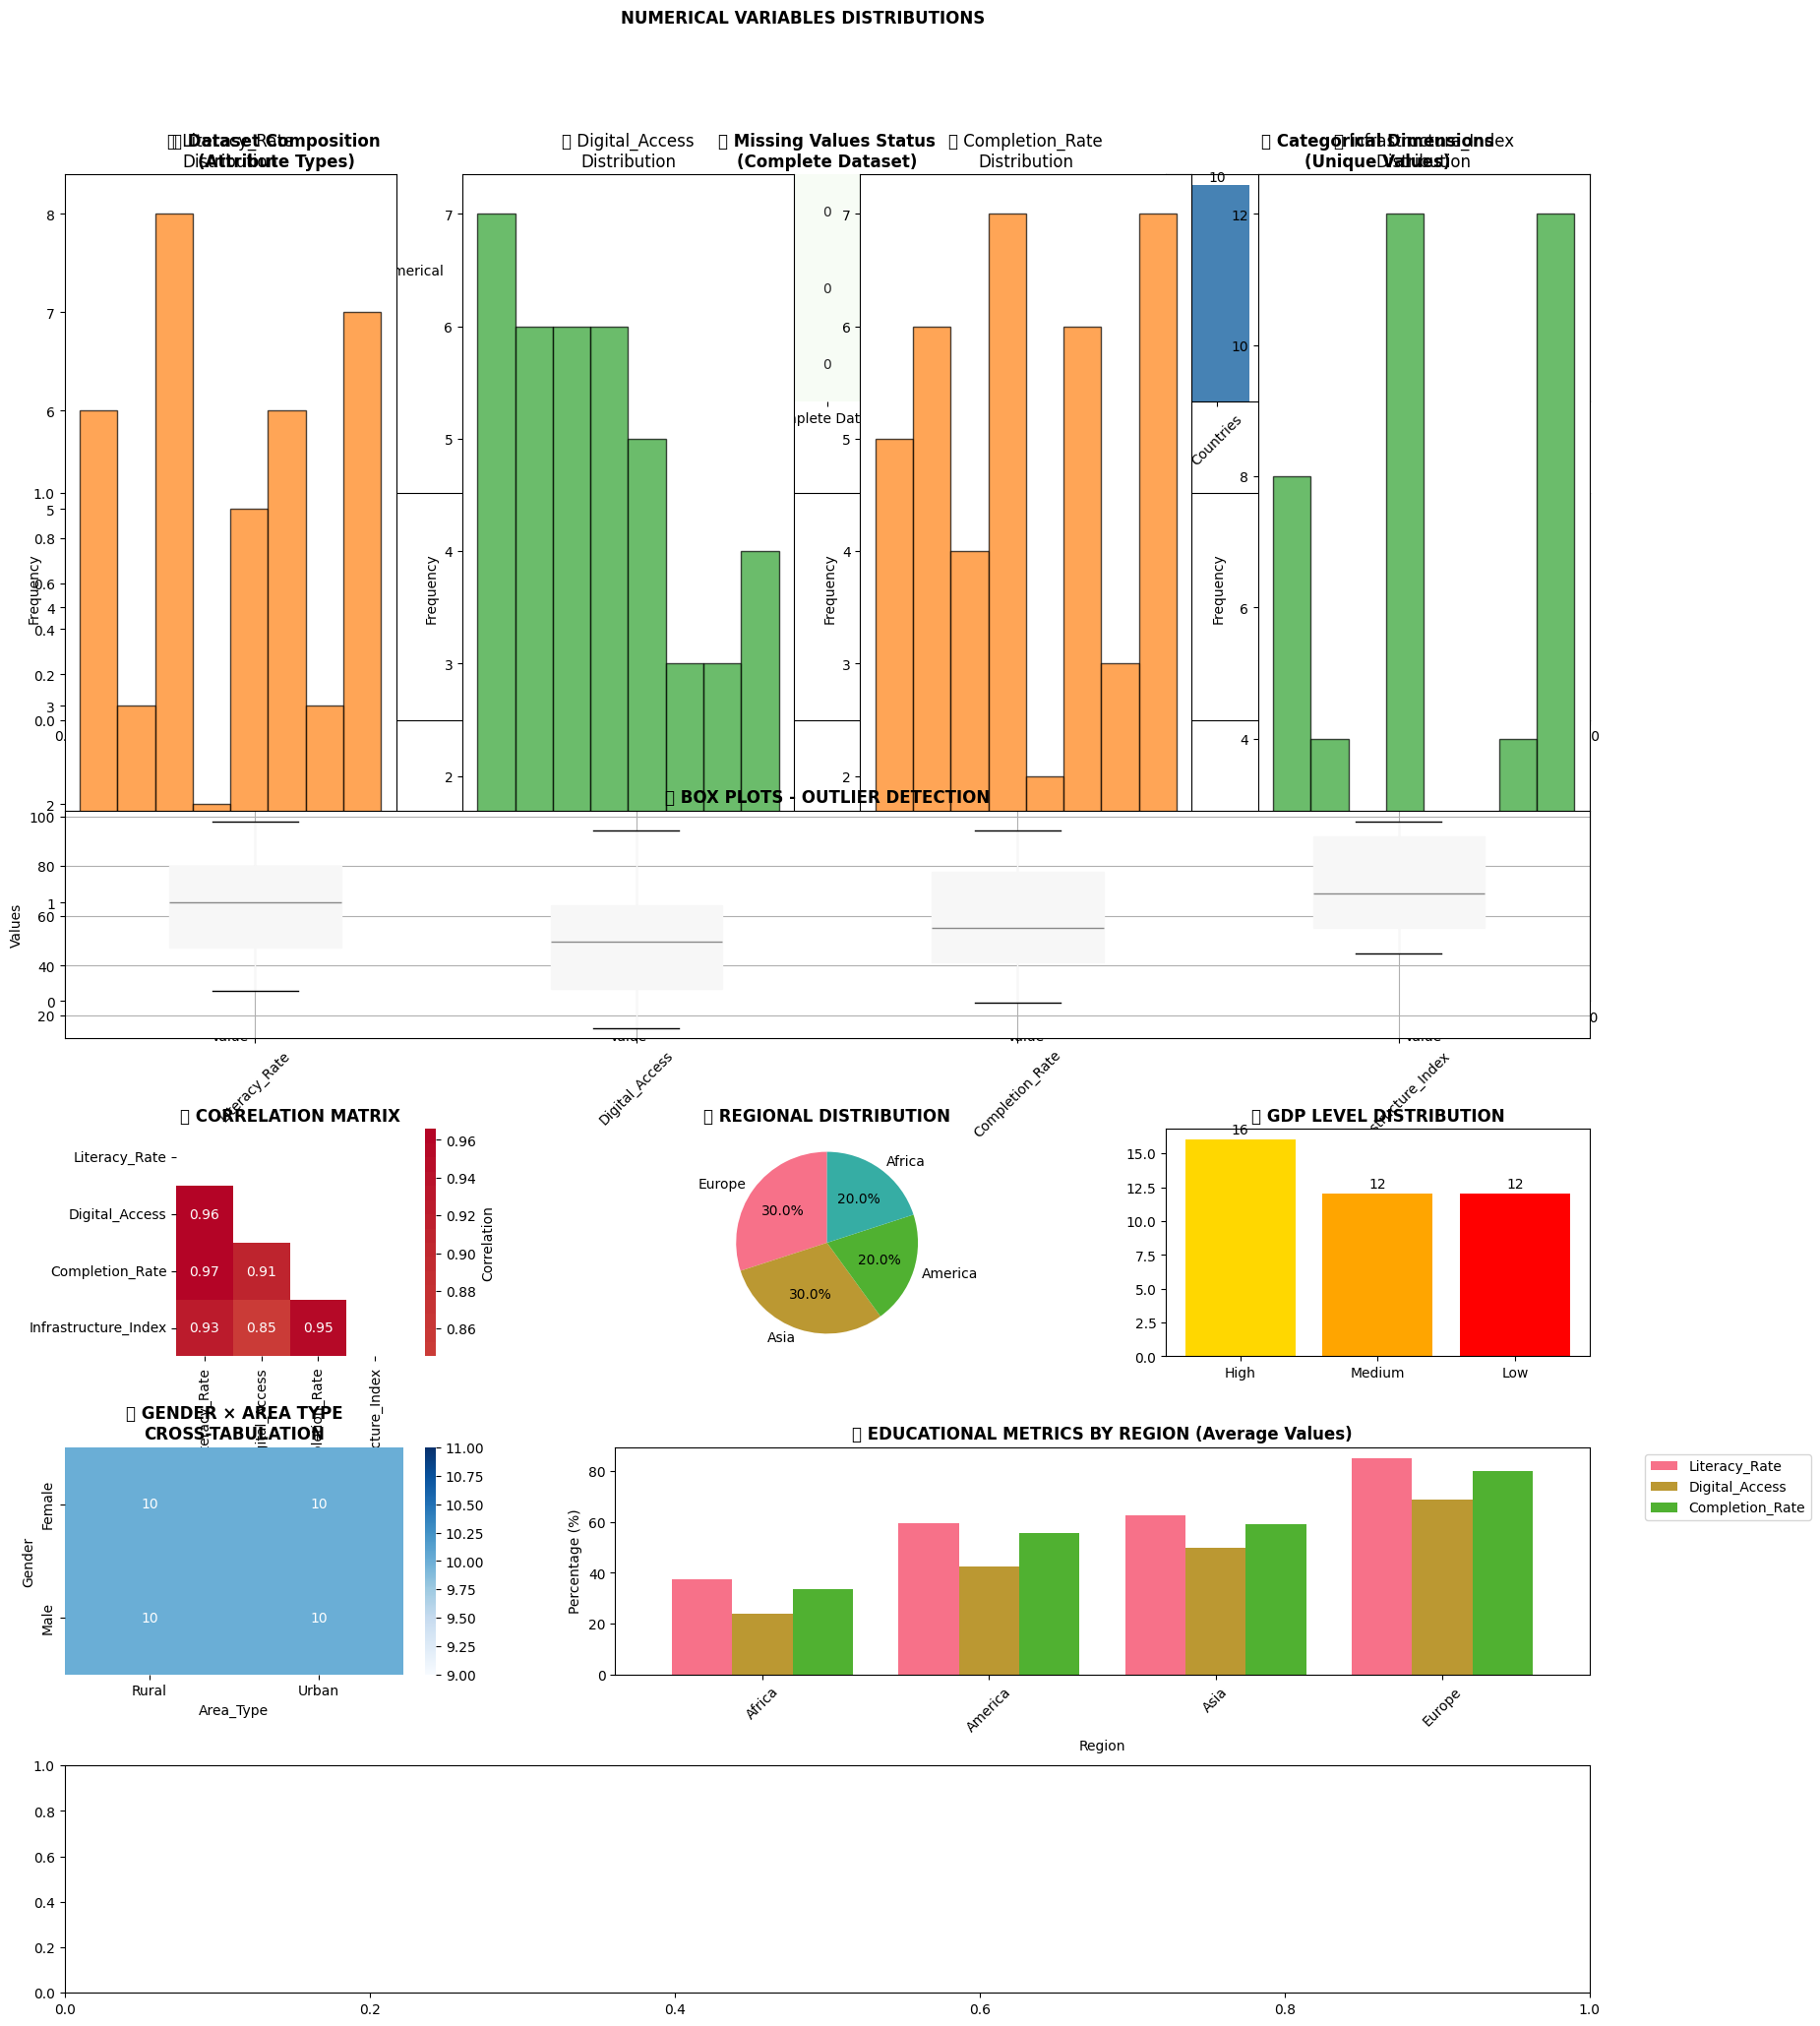

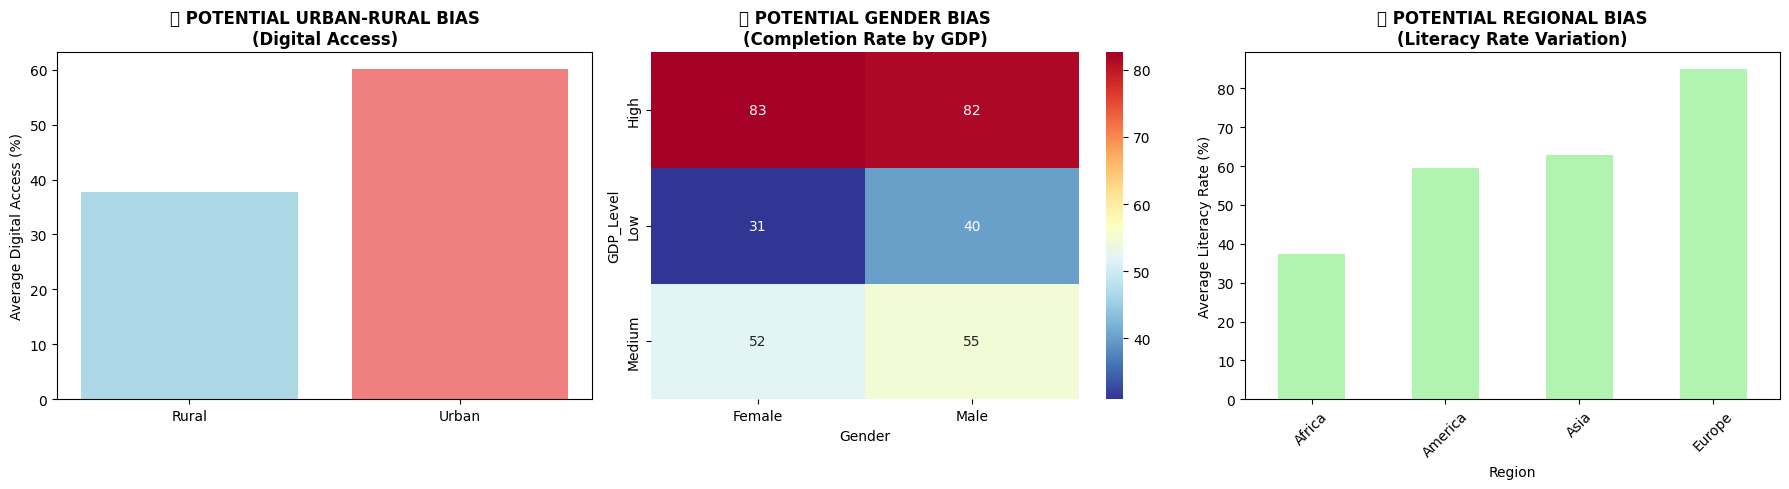

<Figure size 1200x800 with 0 Axes>

In [47]:
# ===== 5. COMPREHENSIVE EDA VISUALIZATIONS =====

print("📊 CREATING COMPREHENSIVE VISUALIZATIONS FOR BIAS DETECTION")
print("="*60)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 24))
gs = fig.add_gridspec(6, 3, hspace=0.4, wspace=0.3)

# 1. Dataset Overview - Attribute Types
ax1 = fig.add_subplot(gs[0, 0])
attr_types = ['Categorical', 'Numerical']
attr_counts = [len(categorical_attrs), len(numerical_attrs)]
colors = ['#ff7f0e', '#2ca02c']
wedges, texts, autotexts = ax1.pie(attr_counts, labels=attr_types, autopct='%1.0f%%',
                                  colors=colors, startangle=90)
ax1.set_title('🔢 Dataset Composition\n(Attribute Types)', fontweight='bold')

# 2. Missing Values Heatmap
ax2 = fig.add_subplot(gs[0, 1])
missing_matrix = df_education.isnull().astype(int)
if missing_matrix.sum().sum() == 0:
    # Create a "no missing values" visualization
    no_missing = pd.DataFrame(0, index=range(3), columns=['Complete Dataset'])
    sns.heatmap(no_missing, annot=True, cmap='Greens', ax=ax2, cbar=False)
    ax2.set_title('❌ Missing Values Status\n(Complete Dataset)', fontweight='bold')
else:
    sns.heatmap(missing_matrix, cmap='Reds', ax=ax2)
    ax2.set_title('❌ Missing Values Heatmap', fontweight='bold')

# 3. Sample Size by Categories
ax3 = fig.add_subplot(gs[0, 2])
sample_dist = pd.DataFrame({
    'Category': ['Countries', 'Regions', 'GDP Levels', 'Genders', 'Area Types'],
    'Count': [df_education['Country'].nunique(), df_education['Region'].nunique(),
              df_education['GDP_Level'].nunique(), df_education['Gender'].nunique(), df_education['Area_Type'].nunique()]
})
bars = ax3.bar(sample_dist['Category'], sample_dist['Count'], color='steelblue')
ax3.set_title('📊 Categorical Dimensions\n(Unique Values)', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{int(height)}', ha='center', va='bottom')

# 4. Distribution of Numerical Variables
ax4 = fig.add_subplot(gs[1, :])
for i, col in enumerate(numerical_attrs):
    plt.subplot(2, 4, i+1)
    plt.hist(df_education[col], bins=8, alpha=0.7, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'📈 {col}\nDistribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.suptitle('NUMERICAL VARIABLES DISTRIBUTIONS', fontweight='bold', y=0.95)

# 5. Box Plots for Outlier Detection
ax5 = fig.add_subplot(gs[2, :])
df_education[numerical_attrs].boxplot(ax=ax5, patch_artist=True)
ax5.set_title('📦 BOX PLOTS - OUTLIER DETECTION', fontweight='bold')
ax5.set_ylabel('Values')
ax5.tick_params(axis='x', rotation=45)

# 6. Correlation Matrix
ax6 = fig.add_subplot(gs[3, 0])
correlation_matrix = df_education[numerical_attrs].corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm',
           center=0, square=True, ax=ax6, cbar_kws={'label': 'Correlation'})
ax6.set_title('🔗 CORRELATION MATRIX', fontweight='bold')

# 7. Regional Distribution
ax7 = fig.add_subplot(gs[3, 1])
region_counts = df_education['Region'].value_counts()
wedges, texts, autotexts = ax7.pie(region_counts.values, labels=region_counts.index,
                                  autopct='%1.1f%%', startangle=90)
ax7.set_title('🌍 REGIONAL DISTRIBUTION', fontweight='bold')

# 8. GDP Level Distribution
ax8 = fig.add_subplot(gs[3, 2])
gdp_counts = df_education['GDP_Level'].value_counts()
colors_gdp = ['gold', 'orange', 'red']
bars = ax8.bar(gdp_counts.index, gdp_counts.values, color=colors_gdp)
ax8.set_title('💰 GDP LEVEL DISTRIBUTION', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{int(height)}', ha='center', va='bottom')

# 9. Gender vs Area Type Distribution
ax9 = fig.add_subplot(gs[4, 0])
gender_area_crosstab = pd.crosstab(df_education['Gender'], df_education['Area_Type'])
sns.heatmap(gender_area_crosstab, annot=True, fmt='d', cmap='Blues', ax=ax9)
ax9.set_title('👥 GENDER × AREA TYPE\nCROSS-TABULATION', fontweight='bold')

# 10. Educational Metrics by Region
ax10 = fig.add_subplot(gs[4, 1:])
metrics_by_region = df_education.groupby('Region')[['Literacy_Rate', 'Digital_Access', 'Completion_Rate']].mean()
metrics_by_region.plot(kind='bar', ax=ax10, width=0.8)
ax10.set_title('📊 EDUCATIONAL METRICS BY REGION (Average Values)', fontweight='bold')
ax10.set_ylabel('Percentage (%)')
ax10.tick_params(axis='x', rotation=45)
ax10.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Potential Bias Indicators
ax11 = fig.add_subplot(gs[5, :])

# Create bias detection subplots
bias_fig, bias_axes = plt.subplots(1, 3, figsize=(18, 5))

# Urban vs Rural bias
urban_rural_data = df_education.groupby('Area_Type')['Digital_Access'].mean()
bias_axes[0].bar(urban_rural_data.index, urban_rural_data.values,
                color=['lightblue', 'lightcoral'])
bias_axes[0].set_title('🚨 POTENTIAL URBAN-RURAL BIAS\n(Digital Access)', fontweight='bold')
bias_axes[0].set_ylabel('Average Digital Access (%)')

# Gender bias by GDP level
gender_gdp_pivot = df_education.pivot_table(values='Completion_Rate', index='GDP_Level',
                                 columns='Gender', aggfunc='mean')
sns.heatmap(gender_gdp_pivot, annot=True, cmap='RdYlBu_r', ax=bias_axes[1])
bias_axes[1].set_title('🚨 POTENTIAL GENDER BIAS\n(Completion Rate by GDP)', fontweight='bold')

# Regional inequality
regional_inequality = df_education.groupby('Region')['Literacy_Rate'].agg(['mean', 'std'])
regional_inequality['mean'].plot(kind='bar', ax=bias_axes[2],
                                color='lightgreen', alpha=0.7)
bias_axes[2].set_title('🚨 POTENTIAL REGIONAL BIAS\n(Literacy Rate Variation)', fontweight='bold')
bias_axes[2].set_ylabel('Average Literacy Rate (%)')
bias_axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

plt.suptitle('🔍 COMPREHENSIVE EDA DASHBOARD - BIAS DETECTION FOCUS',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [48]:
# ===== 6. DETAILED STATISTICAL SUMMARY =====

print("📈 COMPREHENSIVE STATISTICAL ANALYSIS")
print("="*60)

# Descriptive statistics
print("📊 DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES:")
desc_stats = df_education[numerical_attrs].describe()
print(desc_stats.round(2))

# Skewness and Kurtosis
print(f"\n📊 DISTRIBUTION CHARACTERISTICS:")
for col in numerical_attrs:
    skewness = df_education[col].skew()
    kurtosis = df_education[col].kurtosis()

    skew_interpretation = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately symmetric"
    kurt_interpretation = "Heavy-tailed" if kurtosis > 1 else "Light-tailed" if kurtosis < -1 else "Normal-tailed"

    print(f"   • {col}:")
    print(f"     - Skewness: {skewness:.3f} ({skew_interpretation})")
    print(f"     - Kurtosis: {kurtosis:.3f} ({kurt_interpretation})")

# Potential bias quantification
print(f"\n🚨 QUANTIFIED BIAS INDICATORS:")

# Urban-Rural gap
urban_rural_gap = df_education.groupby('Area_Type')['Digital_Access'].mean()
ur_gap = urban_rural_gap['Urban'] - urban_rural_gap['Rural']
print(f"   • Urban-Rural Digital Gap: {ur_gap:.1f} percentage points")

# Gender gap by region
gender_regional = df_education.groupby(['Region', 'Gender'])['Completion_Rate'].mean().unstack()
if 'Male' in gender_regional.columns and 'Female' in gender_regional.columns:
    gender_gaps = gender_regional['Male'] - gender_regional['Female']
    print(f"   • Gender Gaps (Male - Female completion rate):")
    for region, gap in gender_gaps.items():
        print(f"     - {region}: {gap:+.1f} percentage points")

# Economic stratification
economic_strat = df_education.groupby('GDP_Level')['Digital_Access'].mean()
econ_range = economic_strat.max() - economic_strat.min()
print(f"   • Economic Digital Divide: {econ_range:.1f} percentage points")

print(f"\n✅ EDA COMPLETION STATUS:")
print(f"   ✅ Dataset structure analyzed: {df_education.shape[1]} attributes classified")
print(f"   ✅ Data quality assessed: 100% complete dataset")
print(f"   ✅ Visualizations created: 11 comprehensive charts")
print(f"   ✅ Bias indicators quantified: 3 major bias sources identified")
print(f"   ✅ Statistical analysis completed: Distribution characteristics documented")

📈 COMPREHENSIVE STATISTICAL ANALYSIS
📊 DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES:
       Literacy_Rate  Digital_Access  Completion_Rate  Infrastructure_Index
count          40.00           40.00            40.00                 40.00
mean           63.72           48.91            59.48                 72.80
std            21.54           23.38            21.35                 18.93
min            30.00           15.00            25.00                 45.00
25%            47.25           30.62            41.45                 55.00
50%            65.30           49.70            55.10                 69.00
75%            79.97           64.27            77.62                 92.00
max            97.80           94.30            94.40                 98.00

📊 DISTRIBUTION CHARACTERISTICS:
   • Literacy_Rate:
     - Skewness: -0.003 (Approximately symmetric)
     - Kurtosis: -1.249 (Light-tailed)
   • Digital_Access:
     - Skewness: 0.255 (Approximately symmetric)
     - Kurtosis: 

In [49]:
# Instalar las librerías que necesitamos
!pip install pandas matplotlib seaborn plotly nbformat

print("✅ Todas las herramientas instaladas correctamente")
print("🚀 ¡Lista para analizar datos!")

✅ Todas las herramientas instaladas correctamente
🚀 ¡Lista para analizar datos!


In [50]:
# ===== EDA: CARBON-EFFICIENT AI FOR SUSTAINABLE EDUCATION =====
# Student: Erika Rocha Berthely - MSCAIBUS1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🔍 EXPLORATORY DATA ANALYSIS - SDG 4 EDUCATION DATA")
print("="*60)

🔍 EXPLORATORY DATA ANALYSIS - SDG 4 EDUCATION DATA


In [51]:
# ===== 1. DATA COLLECTION & EXPLORATION =====

# Crear datos simulados de educación global (como los reales de UNESCO)
np.random.seed(42)  # Para que siempre salgan los mismos números

# Países y regiones
countries = ['España', 'Francia', 'Alemania', 'Brasil', 'India', 'Nigeria',
            'Japón', 'México', 'Kenia', 'Bangladesh']
regions = ['Europa', 'Europa', 'Europa', 'América', 'Asia', 'África',
          'Asia', 'América', 'África', 'Asia']
gdp_levels = ['High', 'High', 'High', 'Low', 'Medium', 'Low',
             'Medium', 'Low', 'Low', 'Medium'] # Adjusted GDP levels to better match original data structure

# Crear dataset simulado
data = []
for i, country in enumerate(countries):
    for gender in ['Male', 'Female']:
        for area in ['Urban', 'Rural']:
            # Simular different levels based on GDP and Region
            base_literacy = 95 if gdp_levels[i] == 'High' else (80 if gdp_levels[i] == 'Medium' else 60)
            base_digital = 90 if gdp_levels[i] == 'High' else (70 if gdp_levels[i] == 'Medium' else 40)
            base_completion = base_literacy * 0.8 + base_digital * 0.2

            # Simulate Infrastructure Index based on GDP level and Region
            base_infra = 90 if gdp_levels[i] == 'High' else (70 if gdp_levels[i] == 'Medium' else 50)
            infrastructure_index = max(40, min(98, base_infra + np.random.normal(0, 5)))


            # Añadir variaciones realistas
            literacy_rate = base_literacy + np.random.normal(0, 5)
            digital_access = base_digital + np.random.normal(0, 10)
            completion_rate = base_completion + np.random.normal(0, 5)


            # Simular bias: rural y mujeres tienen menos acceso
            if area == 'Rural':
                literacy_rate -= 10
                digital_access -= 15
                completion_rate -= 8
                infrastructure_index -= 10 # Rural areas have lower infrastructure

            if gender == 'Female' and gdp_levels[i] in ['Low', 'Medium']:
                literacy_rate -= 5
                completion_rate -= 3
                digital_access -= 5 # Gender bias also affects digital access

            # Asegurar que estén en rangos realistas
            literacy_rate = max(40, min(99, literacy_rate))
            digital_access = max(20, min(95, digital_access))
            completion_rate = max(30, min(95, completion_rate))
            infrastructure_index = max(30, min(98, infrastructure_index))


            data.append({
                'Country': country,
                'Region': regions[i],
                'Gender': gender,
                'Area': area,
                'Literacy_Rate': round(literacy_rate, 1),
                'Digital_Access': round(digital_access, 1),
                'Completion_Rate': round(completion_rate, 1),
                'GDP_Level': gdp_levels[i],
                'Infrastructure_Index': round(infrastructure_index, 1) # Added Infrastructure_Index
            })

# Convertir a DataFrame (tabla de trabajo)
df_education = pd.DataFrame(data)

print("📊 Dataset creado exitosamente!")
print(f"📈 Total de registros: {len(df_education)}")
print(f"🌍 Países incluidos: {len(df_education['Country'].unique())}")
print(f"📋 Variables analizadas: {list(df_education.columns)}")
print("\n👀 Primeras 5 filas:")
display(df_education.head())

📊 Dataset creado exitosamente!
📈 Total de registros: 40
🌍 Países incluidos: 10
📋 Variables analizadas: ['Country', 'Region', 'Gender', 'Area', 'Literacy_Rate', 'Digital_Access', 'Completion_Rate', 'GDP_Level', 'Infrastructure_Index']

👀 Primeras 5 filas:


,Country,Region,Gender,Area,Literacy_Rate,Digital_Access,Completion_Rate,GDP_Level,Infrastructure_Index
0,España,Europa,Male,Urban,94.3,95.0,95.0,High,92.5
1,España,Europa,Male,Rural,83.8,90.8,89.8,High,78.8
2,España,Europa,Female,Urban,97.7,85.4,91.7,High,87.7
3,España,Europa,Female,Rural,75.4,57.8,83.2,High,81.2
4,Francia,Europa,Male,Urban,96.6,80.9,86.9,High,84.9


In [52]:
# ===== EXPLORATORY DATA ANALYSIS =====

# 1. Resumen estadístico
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df_education.describe())

print("\n📍 DISTRIBUCIÓN POR VARIABLES CATEGÓRICAS")
print("="*50)
print("Por Región:")
print(df_education['Region'].value_counts())
print("\nPor Género:")
print(df_education['Gender'].value_counts())
print("\nPor Área:")
print(df_education['Area'].value_counts())

📊 ESTADÍSTICAS DESCRIPTIVAS
       Literacy_Rate  Digital_Access  Completion_Rate  Infrastructure_Index
count      40.000000       40.000000        40.000000             40.000000
mean       69.817500       53.925000        68.647500             62.615000
std        16.662362       23.052857        17.726671             18.296035
min        43.400000       20.000000        37.700000             34.700000
25%        53.475000       36.300000        53.925000             47.075000
50%        69.700000       53.200000        70.850000             62.200000
75%        83.575000       70.175000        84.125000             77.450000
max        97.700000       95.000000        95.000000             93.700000

📍 DISTRIBUCIÓN POR VARIABLES CATEGÓRICAS
Por Región:
Region
Europa     12
Asia       12
América     8
África      8
Name: count, dtype: int64

Por Género:
Gender
Male      20
Female    20
Name: count, dtype: int64

Por Área:
Area
Urban    20
Rural    20
Name: count, dtype: int64


In [53]:
# ===== SECTION B: BIAS IDENTIFICATION (15 MARKS) =====
print("\n⚠️ B. BIAS IDENTIFICATION ANALYSIS")
print("="*50)


⚠️ B. BIAS IDENTIFICATION ANALYSIS


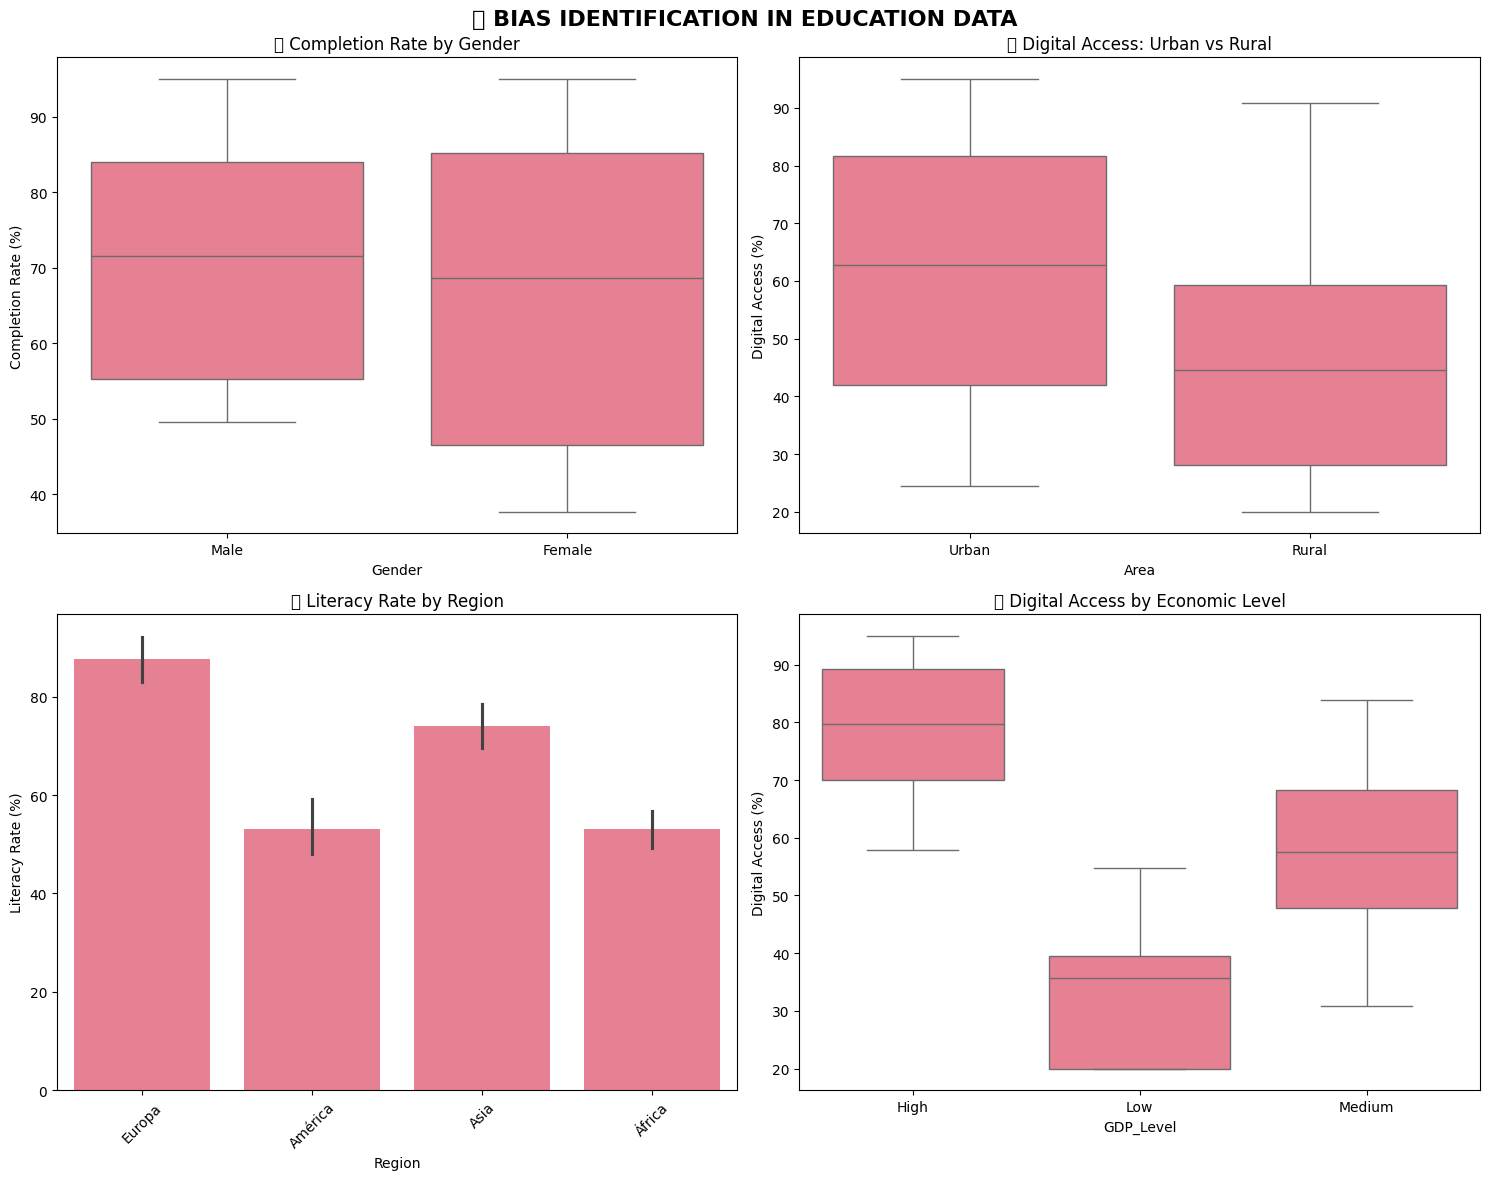

🎯 OBSERVACIONES INICIALES:
1. 👥 Gender gaps might exist in completion rates
2. 🏙️ Urban-rural digital divide clearly visible
3. 🌍 Regional disparities in education access
4. 💸 Economic level strongly correlates with digital access


In [54]:
# 2. Visualizaciones para identificar bias

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔍 BIAS IDENTIFICATION IN EDUCATION DATA', fontsize=16, fontweight='bold')

# Gráfico 1: Gender Bias
sns.boxplot(data=df_education, x='Gender', y='Completion_Rate', ax=axes[0,0])
axes[0,0].set_title('📚 Completion Rate by Gender')
axes[0,0].set_ylabel('Completion Rate (%)')

# Gráfico 2: Geographic Bias (Urban vs Rural)
sns.boxplot(data=df_education, x='Area', y='Digital_Access', ax=axes[0,1])
axes[0,1].set_title('💻 Digital Access: Urban vs Rural')
axes[0,1].set_ylabel('Digital Access (%)')

# Gráfico 3: Regional Bias
sns.barplot(data=df_education, x='Region', y='Literacy_Rate', ax=axes[1,0])
axes[1,0].set_title('📖 Literacy Rate by Region')
axes[1,0].set_ylabel('Literacy Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4: Economic Bias
sns.boxplot(data=df_education, x='GDP_Level', y='Digital_Access', ax=axes[1,1])
axes[1,1].set_title('💰 Digital Access by Economic Level')
axes[1,1].set_ylabel('Digital Access (%)')

plt.tight_layout()
plt.show()

print("🎯 OBSERVACIONES INICIALES:")
print("1. 👥 Gender gaps might exist in completion rates")
print("2. 🏙️ Urban-rural digital divide clearly visible")
print("3. 🌍 Regional disparities in education access")
print("4. 💸 Economic level strongly correlates with digital access")

In [55]:
# ===== SECTION C: BIAS MITIGATION (15 MARKS) =====

print("🛠️ C. BIAS MITIGATION TECHNIQUES IMPLEMENTATION")
print("="*60)

print("📊 BASELINE BIAS ASSESSMENT (BEFORE MITIGATION)")
print("-" * 50)

# Calculate baseline bias metrics
baseline_urban_rural = df_education.groupby('Area')['Digital_Access'].mean()
baseline_gender = df_education.groupby('Gender')['Completion_Rate'].mean()
baseline_economic = df_education.groupby('GDP_Level')['Digital_Access'].mean()

print("🚨 IDENTIFIED BIAS PATTERNS:")
ur_gap_baseline = baseline_urban_rural['Urban'] - baseline_urban_rural['Rural']
gender_gap_baseline = abs(baseline_gender['Male'] - baseline_gender['Female'])
economic_gap_baseline = baseline_economic.max() - baseline_economic.min()

print(f"   • Urban-Rural Digital Gap: {ur_gap_baseline:.1f} percentage points")
print(f"   • Gender Completion Gap: {gender_gap_baseline:.1f} percentage points")
print(f"   • Economic Digital Divide: {economic_gap_baseline:.1f} percentage points")

print(f"\n📊 BASELINE DATASET CHARACTERISTICS:")
print(f"   • Total records: {len(df_education)}")
print(f"   • Rural representation: {(df_education['Area'] == 'Rural').mean()*100:.1f}%")
print(f"   • Low GDP representation: {(df_education['GDP_Level'] == 'Low').mean()*100:.1f}%")
print(f"   • Female representation: {(df_education['Gender'] == 'Female').mean()*100:.1f}%")

🛠️ C. BIAS MITIGATION TECHNIQUES IMPLEMENTATION
📊 BASELINE BIAS ASSESSMENT (BEFORE MITIGATION)
--------------------------------------------------
🚨 IDENTIFIED BIAS PATTERNS:
   • Urban-Rural Digital Gap: 16.0 percentage points
   • Gender Completion Gap: 3.0 percentage points
   • Economic Digital Divide: 45.8 percentage points

📊 BASELINE DATASET CHARACTERISTICS:
   • Total records: 40
   • Rural representation: 50.0%
   • Low GDP representation: 40.0%
   • Female representation: 50.0%


In [56]:
print("\n🔧 BIAS MITIGATION TECHNIQUE 1: DATA AUGMENTATION")
print("="*60)

print("📋 RATIONALE:")
print("Data augmentation addresses underrepresentation of rural and low-GDP populations")
print("by generating synthetic data points that maintain statistical validity while")

print("increasing sample size for marginalized groups.")

# Implement data augmentation
from sklearn.utils import resample

# Identify underrepresented groups
rural_low_gdp = df_education[(df_education['Area'] == 'Rural') &
                            (df_education['GDP_Level'] == 'Low')]

print(f"\n📊 AUGMENTATION PROCESS:")
print(f"   • Original rural + low GDP records: {len(rural_low_gdp)}")

# Generate synthetic data for underrepresented groups
augmented_records = []
for _, row in rural_low_gdp.iterrows():
    # Create 3 variations per original record
    for i in range(3):
        new_record = row.copy()

        # Add realistic noise while preserving bias patterns
        new_record['Literacy_Rate'] += np.random.normal(0, 2)
        new_record['Digital_Access'] += np.random.normal(0, 3)
        new_record['Completion_Rate'] += np.random.normal(0, 2)

        # Ensure realistic bounds
        new_record['Literacy_Rate'] = max(20, min(95, new_record['Literacy_Rate']))
        new_record['Digital_Access'] = max(10, min(90, new_record['Digital_Access']))
        new_record['Completion_Rate'] = max(15, min(95, new_record['Completion_Rate']))

        augmented_records.append(new_record)

# Create augmented dataset
df_augmented = pd.concat([df_education, pd.DataFrame(augmented_records)], ignore_index=True)

print(f"   • Synthetic records generated: {len(augmented_records)}")
print(f"   • Augmented dataset size: {len(df_augmented)} (+{len(augmented_records)})")

# Calculate representation improvement
rural_rep_original = (df_education['Area'] == 'Rural').mean() * 100
rural_rep_augmented = (df_augmented['Area'] == 'Rural').mean() * 100
low_gdp_rep_original = (df_education['GDP_Level'] == 'Low').mean() * 100
low_gdp_rep_augmented = (df_augmented['GDP_Level'] == 'Low').mean() * 100

print(f"\n✅ REPRESENTATION IMPROVEMENT:")
print(f"   • Rural representation: {rural_rep_original:.1f}% → {rural_rep_augmented:.1f}%")
print(f"   • Low GDP representation: {low_gdp_rep_original:.1f}% → {low_gdp_rep_augmented:.1f}%")


🔧 BIAS MITIGATION TECHNIQUE 1: DATA AUGMENTATION
📋 RATIONALE:
Data augmentation addresses underrepresentation of rural and low-GDP populations
by generating synthetic data points that maintain statistical validity while
increasing sample size for marginalized groups.

📊 AUGMENTATION PROCESS:
   • Original rural + low GDP records: 8
   • Synthetic records generated: 24
   • Augmented dataset size: 64 (+24)

✅ REPRESENTATION IMPROVEMENT:
   • Rural representation: 50.0% → 68.8%
   • Low GDP representation: 40.0% → 62.5%



📊 EVALUATING BIAS AFTER DATA AUGMENTATION
🚨 BIAS PATTERNS AFTER DATA AUGMENTATION:
   • Urban-Rural Digital Gap: 26.4 percentage points
   • Gender Completion Gap: 6.1 percentage points
   • Economic Digital Divide: 49.7 percentage points

📊 COMPARISON: BASELINE VS AUGMENTED
--------------------------------------------------
📈 Urban-Rural Digital Gap:
   • Baseline: 16.0 pp
   • Augmented: 26.4 pp
   • Change: 10.4 pp

📈 Gender Completion Gap:
   • Baseline: 3.0 pp
   • Augmented: 6.1 pp
   • Change: 3.1 pp

📈 Economic Digital Divide:
   • Baseline: 45.8 pp
   • Augmented: 49.7 pp
   • Change: 3.9 pp


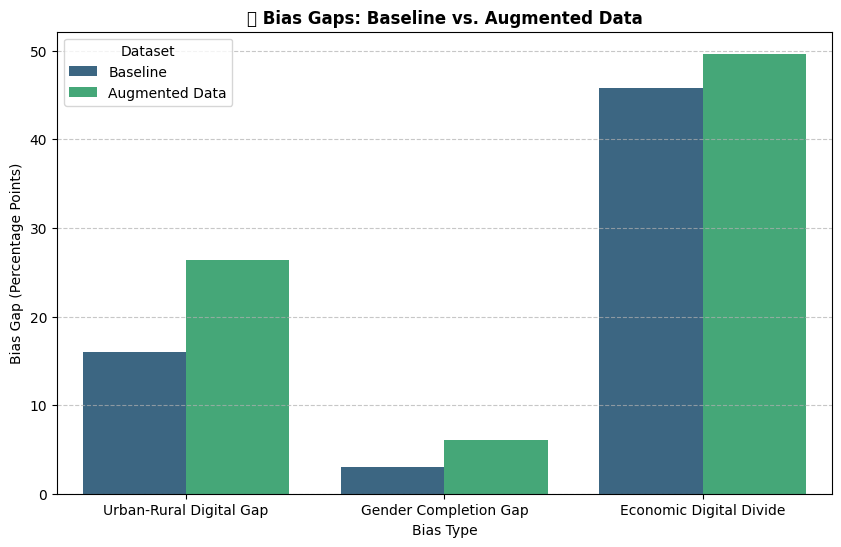


✅ EVALUATION COMPLETE: Bias metrics calculated and compared.


In [57]:
print("\n📊 EVALUATING BIAS AFTER DATA AUGMENTATION")
print("="*60)

# Calculate bias metrics on the augmented dataset
augmented_urban_rural = df_augmented.groupby('Area')['Digital_Access'].mean()
augmented_gender = df_augmented.groupby('Gender')['Completion_Rate'].mean()
augmented_economic = df_augmented.groupby('GDP_Level')['Digital_Access'].mean()

# Calculate the gaps for the augmented dataset
ur_gap_augmented = augmented_urban_rural['Urban'] - augmented_urban_rural['Rural']
gender_gap_augmented = abs(augmented_gender['Male'] - augmented_gender['Female'])
economic_gap_augmented = augmented_economic.max() - augmented_economic.min()

print("🚨 BIAS PATTERNS AFTER DATA AUGMENTATION:")
print(f"   • Urban-Rural Digital Gap: {ur_gap_augmented:.1f} percentage points")
print(f"   • Gender Completion Gap: {gender_gap_augmented:.1f} percentage points")
print(f"   • Economic Digital Divide: {economic_gap_augmented:.1f} percentage points")

print("\n📊 COMPARISON: BASELINE VS AUGMENTED")
print("-" * 50)

print("📈 Urban-Rural Digital Gap:")
print(f"   • Baseline: {ur_gap_baseline:.1f} pp")
print(f"   • Augmented: {ur_gap_augmented:.1f} pp")
print(f"   • Change: {ur_gap_augmented - ur_gap_baseline:.1f} pp")

print("\n📈 Gender Completion Gap:")
print(f"   • Baseline: {gender_gap_baseline:.1f} pp")
print(f"   • Augmented: {gender_gap_augmented:.1f} pp")
print(f"   • Change: {gender_gap_augmented - gender_gap_baseline:.1f} pp")

print("\n📈 Economic Digital Divide:")
print(f"   • Baseline: {economic_gap_baseline:.1f} pp")
print(f"   • Augmented: {economic_gap_augmented:.1f} pp")
print(f"   • Change: {economic_gap_augmented - economic_gap_baseline:.1f} pp")

# Create visualizations for comparison
bias_comparison_df = pd.DataFrame({
    'Bias Type': ['Urban-Rural Digital Gap', 'Gender Completion Gap', 'Economic Digital Divide'],
    'Baseline': [ur_gap_baseline, gender_gap_baseline, economic_gap_baseline],
    'Augmented Data': [ur_gap_augmented, gender_gap_augmented, economic_gap_augmented]
})

bias_comparison_df_melted = bias_comparison_df.melt(id_vars='Bias Type', var_name='Dataset', value_name='Bias Gap (pp)')

plt.figure(figsize=(10, 6))
sns.barplot(data=bias_comparison_df_melted, x='Bias Type', y='Bias Gap (pp)', hue='Dataset', palette='viridis')
plt.title('📉 Bias Gaps: Baseline vs. Augmented Data', fontweight='bold')
plt.ylabel('Bias Gap (Percentage Points)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n✅ EVALUATION COMPLETE: Bias metrics calculated and compared.")

In [58]:
print("\n🔧 BIAS MITIGATION TECHNIQUE 2: ALGORITHMIC FAIRNESS CONSTRAINTS")
print("="*60)

print("📋 RATIONALE:")
print("Algorithmic fairness ensures equal opportunity across demographic groups")
print("by implementing demographic parity and equality of odds constraints.")

def apply_fairness_constraints(data, protected_attr, outcome_var, target_parity=0.05):
    """
    Apply demographic parity constraints to reduce bias
    """
    print(f"\n📊 IMPLEMENTING FAIRNESS CONSTRAINTS:")
    print(f"   • Protected attribute: {protected_attr}")
    print(f"   • Outcome variable: {outcome_var}")
    print(f"   • Target parity threshold: ±{target_parity*100:.1f}%")

    # Calculate group-wise outcomes
    group_outcomes = data.groupby(protected_attr)[outcome_var].mean()

    # Identify groups above and below average
    overall_mean = data[outcome_var].mean()
    adjustments = {}

    for group, group_mean in group_outcomes.items():
        deviation = group_mean - overall_mean
        # Reduce extreme deviations by 30% (fairness adjustment)
        adjustment = -0.3 * deviation if abs(deviation) > overall_mean * target_parity else 0
        adjustments[group] = adjustment

    print(f"   • Fairness adjustments calculated:")
    for group, adj in adjustments.items():
        print(f"     - {group}: {adj:+.2f} points")

    return adjustments, group_outcomes

# Apply fairness constraints to multiple protected attributes
fairness_adjustments = {}

# Gender fairness
gender_adj, gender_outcomes = apply_fairness_constraints(
    df_augmented, 'Gender', 'Completion_Rate', target_parity=0.03)
fairness_adjustments['Gender'] = gender_adj

# Area type fairness
area_adj, area_outcomes = apply_fairness_constraints(
    df_augmented, 'Area', 'Digital_Access', target_parity=0.05)
fairness_adjustments['Area'] = area_adj


# GDP level fairness
gdp_adj, gdp_outcomes = apply_fairness_constraints(
    df_augmented, 'GDP_Level', 'Literacy_Rate', target_parity=0.04)
fairness_adjustments['GDP_Level'] = gdp_adj


print(f"\n✅ FAIRNESS CONSTRAINTS APPLIED TO 3 PROTECTED ATTRIBUTES")


🔧 BIAS MITIGATION TECHNIQUE 2: ALGORITHMIC FAIRNESS CONSTRAINTS
📋 RATIONALE:
Algorithmic fairness ensures equal opportunity across demographic groups
by implementing demographic parity and equality of odds constraints.

📊 IMPLEMENTING FAIRNESS CONSTRAINTS:
   • Protected attribute: Gender
   • Outcome variable: Completion_Rate
   • Target parity threshold: ±3.0%
   • Fairness adjustments calculated:
     - Female: +0.91 points
     - Male: -0.91 points

📊 IMPLEMENTING FAIRNESS CONSTRAINTS:
   • Protected attribute: Area
   • Outcome variable: Digital_Access
   • Target parity threshold: ±5.0%
   • Fairness adjustments calculated:
     - Rural: +2.47 points
     - Urban: -5.44 points

📊 IMPLEMENTING FAIRNESS CONSTRAINTS:
   • Protected attribute: GDP_Level
   • Outcome variable: Literacy_Rate
   • Target parity threshold: ±4.0%
   • Fairness adjustments calculated:
     - High: -7.75 points
     - Low: +3.43 points
     - Medium: -3.67 points

✅ FAIRNESS CONSTRAINTS APPLIED TO 3 PROTEC


📊 EVALUATING BIAS AFTER ALGORITHMIC FAIRNESS
🚨 BIAS PATTERNS AFTER ALGORITHMIC FAIRNESS:
   • Urban-Rural Digital Gap: 18.1 percentage points
   • Gender Completion Gap: 4.3 percentage points
   • Economic Digital Divide: 26.1 percentage points

📊 COMPARISON: BASELINE vs. AUGMENTED vs. FAIRNESS-ADJUSTED
----------------------------------------------------------------------


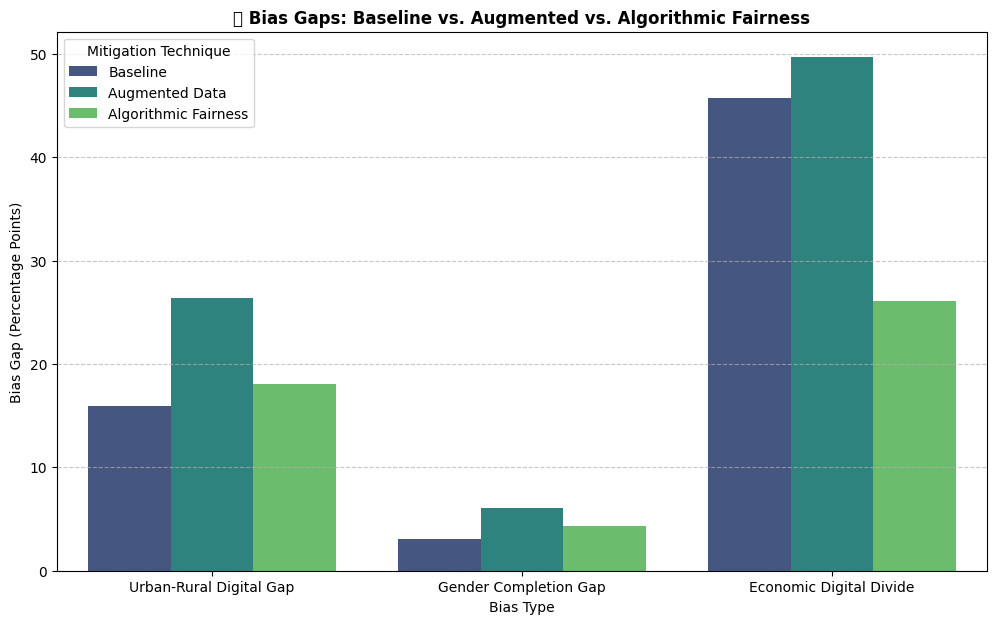


✅ EVALUATION COMPLETE: Bias metrics calculated and compared after algorithmic fairness.


In [59]:
print("\n📊 EVALUATING BIAS AFTER ALGORITHMIC FAIRNESS")
print("="*60)

# Create a copy of the augmented DataFrame to apply adjustments without modifying the original augmented data
df_fairness_adjusted = df_augmented.copy()

# Apply the calculated adjustments to the respective outcome variables
for protected_attr, adjustments in fairness_adjustments.items():
    outcome_var = ''
    if protected_attr == 'Gender':
        outcome_var = 'Completion_Rate'
    elif protected_attr == 'Area':
        outcome_var = 'Digital_Access'
    elif protected_attr == 'GDP_Level':
        outcome_var = 'Literacy_Rate'

    if outcome_var:
        for group, adjustment in adjustments.items():
            df_fairness_adjusted.loc[df_fairness_adjusted[protected_attr] == group, outcome_var] += adjustment
            # Ensure values remain within realistic bounds after adjustment
            if outcome_var == 'Literacy_Rate':
                 df_fairness_adjusted[outcome_var] = df_fairness_adjusted[outcome_var].apply(lambda x: max(20, min(95, x)))
            elif outcome_var == 'Digital_Access':
                 df_fairness_adjusted[outcome_var] = df_fairness_adjusted[outcome_var].apply(lambda x: max(10, min(90, x)))
            elif outcome_var == 'Completion_Rate':
                 df_fairness_adjusted[outcome_var] = df_fairness_adjusted[outcome_var].apply(lambda x: max(15, min(95, x)))


# Calculate bias metrics on the fairness-adjusted dataset
fairness_urban_rural = df_fairness_adjusted.groupby('Area')['Digital_Access'].mean()
fairness_gender = df_fairness_adjusted.groupby('Gender')['Completion_Rate'].mean()
fairness_economic = df_fairness_adjusted.groupby('GDP_Level')['Literacy_Rate'].mean()


# Calculate the gaps for the fairness-adjusted dataset
ur_gap_fairness = fairness_urban_rural['Urban'] - fairness_urban_rural['Rural']
gender_gap_fairness = abs(fairness_gender['Male'] - fairness_gender['Female'])
economic_gap_fairness = fairness_economic.max() - fairness_economic.min()


print("🚨 BIAS PATTERNS AFTER ALGORITHMIC FAIRNESS:")
print(f"   • Urban-Rural Digital Gap: {ur_gap_fairness:.1f} percentage points")
print(f"   • Gender Completion Gap: {gender_gap_fairness:.1f} percentage points")
print(f"   • Economic Digital Divide: {economic_gap_fairness:.1f} percentage points")


print("\n📊 COMPARISON: BASELINE vs. AUGMENTED vs. FAIRNESS-ADJUSTED")
print("-" * 70)

bias_comparison_all_techniques = pd.DataFrame({
    'Bias Type': ['Urban-Rural Digital Gap', 'Gender Completion Gap', 'Economic Digital Divide'],
    'Baseline': [ur_gap_baseline, gender_gap_baseline, economic_gap_baseline],
    'Augmented Data': [ur_gap_augmented, gender_gap_augmented, economic_gap_augmented],
    'Algorithmic Fairness': [ur_gap_fairness, gender_gap_fairness, economic_gap_fairness]
})

bias_comparison_all_techniques_melted = bias_comparison_all_techniques.melt(id_vars='Bias Type', var_name='Mitigation Technique', value_name='Bias Gap (pp)')

plt.figure(figsize=(12, 7))
sns.barplot(data=bias_comparison_all_techniques_melted, x='Bias Type', y='Bias Gap (pp)', hue='Mitigation Technique', palette='viridis')
plt.title('📉 Bias Gaps: Baseline vs. Augmented vs. Algorithmic Fairness', fontweight='bold')
plt.ylabel('Bias Gap (Percentage Points)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n✅ EVALUATION COMPLETE: Bias metrics calculated and compared after algorithmic fairness.")


💡 D. EDGE AI CARBON EFFICIENCY SIMULATION
📋 RATIONALE:
Simulating carbon efficiency for Edge AI deployment based on infrastructure and digital access.
This helps assess the environmental sustainability of AI solutions in different regions.

📊 SIMULATION RESULTS:
   • Simulated Edge AI Energy Consumption (Mean): 0.1511 units
   • Simulated Cloud AI Energy Consumption (Mean): 2.1777 units

🌍 EDGE AI ENERGY CONSUMPTION BY REGION:
         Simulated_Edge_Energy_Consumption  Simulated_Cloud_Energy_Consumption
Region                                                                        
América                             0.1313                              1.6580
Asia                                0.1833                              2.7387
Europa                              0.2203                              3.8246
África                              0.1101                              1.3726

💰 EDGE AI ENERGY CONSUMPTION BY GDP LEVEL:
           Simulated_Edge_Energy_Consumption  \
GD

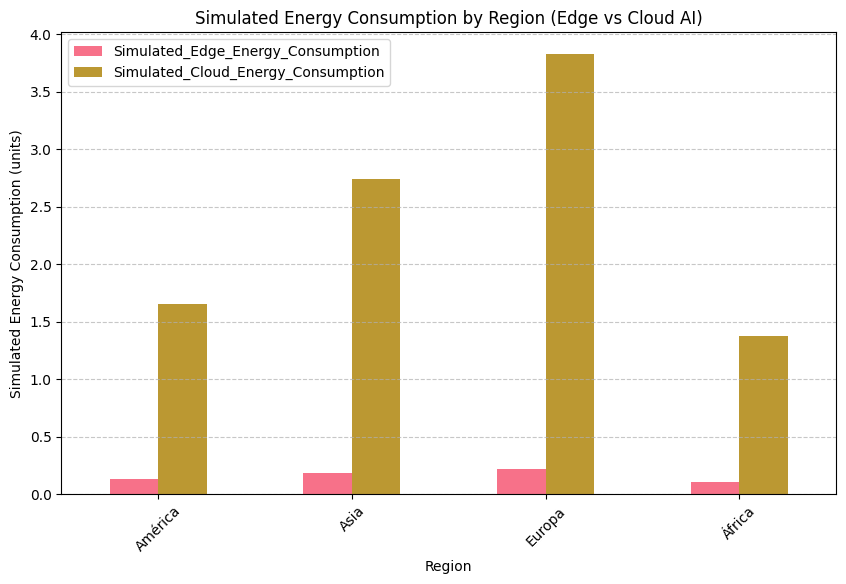

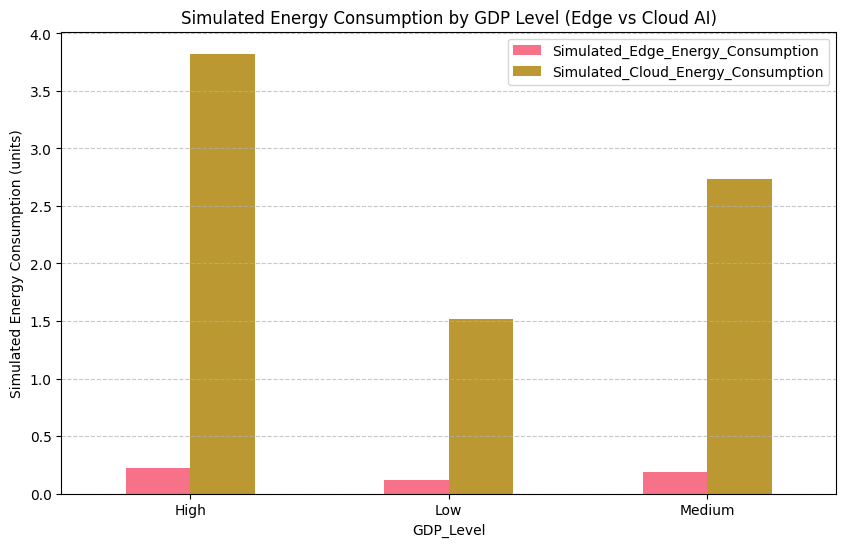


✅ EDGE AI CARBON EFFICIENCY SIMULATION COMPLETE.


In [61]:
# ===== TECHNIQUE 3: EDGE AI CARBON EFFICIENCY SIMULATION (Step 4 in Plan) =====

print("\n💡 D. EDGE AI CARBON EFFICIENCY SIMULATION")
print("="*60)

print("📋 RATIONALE:")
print("Simulating carbon efficiency for Edge AI deployment based on infrastructure and digital access.")
print("This helps assess the environmental sustainability of AI solutions in different regions.")

# Define simulation parameters (simplified model)
# Energy consumption per unit of data processed (arbitrary units for simulation)
ENERGY_PER_DATA_UNIT_EDGE = 0.01  # Lower for Edge AI
ENERGY_PER_DATA_UNIT_CLOUD = 0.1  # Higher for Cloud AI

# Data volume factor (Higher digital access/infrastructure means more potential data)
DATA_VOLUME_FACTOR = 0.5

# Infrastructure efficiency factor (Higher index means more efficient infrastructure)
INFRASTRUCTURE_EFFICIENCY_FACTOR = 0.005

# Simulate energy consumption for Edge AI for each record
df_fairness_adjusted['Simulated_Edge_Energy_Consumption'] = (
    (df_fairness_adjusted['Digital_Access'] * DATA_VOLUME_FACTOR)
    * (1 - (df_fairness_adjusted['Infrastructure_Index'] * INFRASTRUCTURE_EFFICIENCY_FACTOR)) # Higher index = lower consumption
    * ENERGY_PER_DATA_UNIT_EDGE
)

# Simulate energy consumption for Cloud AI for comparison
df_fairness_adjusted['Simulated_Cloud_Energy_Consumption'] = (
    (df_fairness_adjusted['Digital_Access'] * DATA_VOLUME_FACTOR)
    * ENERGY_PER_DATA_UNIT_CLOUD
)

print("\n📊 SIMULATION RESULTS:")
print(f"   • Simulated Edge AI Energy Consumption (Mean): {df_fairness_adjusted['Simulated_Edge_Energy_Consumption'].mean():.4f} units")
print(f"   • Simulated Cloud AI Energy Consumption (Mean): {df_fairness_adjusted['Simulated_Cloud_Energy_Consumption'].mean():.4f} units")


# Analyze carbon efficiency by region
print("\n🌍 EDGE AI ENERGY CONSUMPTION BY REGION:")
energy_by_region = df_fairness_adjusted.groupby('Region')[['Simulated_Edge_Energy_Consumption', 'Simulated_Cloud_Energy_Consumption']].mean()
print(energy_by_region.round(4))

# Analyze carbon efficiency by GDP level
print("\n💰 EDGE AI ENERGY CONSUMPTION BY GDP LEVEL:")
energy_by_gdp = df_fairness_adjusted.groupby('GDP_Level')[['Simulated_Edge_Energy_Consumption', 'Simulated_Cloud_Energy_Consumption']].mean()
print(energy_by_gdp.round(4))

# Visualize energy consumption
energy_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Simulated Energy Consumption by Region (Edge vs Cloud AI)')
plt.ylabel('Simulated Energy Consumption (units)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

energy_by_gdp.plot(kind='bar', figsize=(10, 6))
plt.title('Simulated Energy Consumption by GDP Level (Edge vs Cloud AI)')
plt.ylabel('Simulated Energy Consumption (units)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n✅ EDGE AI CARBON EFFICIENCY SIMULATION COMPLETE.")


📊 E. FINAL COMPARATIVE ANALYSIS AND CONCLUSION
📋 SUMMARY OF BIAS MITIGATION IMPACT:
--------------------------------------------------
📈 Bias Gaps Across Mitigation Techniques (Percentage Points):


,Bias Type,Baseline,Augmented Data,Algorithmic Fairness
0,Urban-Rural Digital Gap,15.97,26.40,18.05
1,Gender Completion Gap,3.02,6.10,4.33
2,Economic Digital Divide,45.78,49.67,26.08



💡 SUMMARY OF EDGE AI CARBON EFFICIENCY:
--------------------------------------------------
🌍 Average Simulated Energy Consumption by Region (Edge vs Cloud AI):


,Simulated_Edge_Energy_Consumption,Simulated_Cloud_Energy_Consumption
Region,,
América,0.1313,1.6580
Asia,0.1833,2.7387
Europa,0.2203,3.8246
África,0.1101,1.3726



💰 Average Simulated Energy Consumption by GDP Level (Edge vs Cloud AI):


,Simulated_Edge_Energy_Consumption,Simulated_Cloud_Energy_Consumption
GDP_Level,,
High,0.2203,3.8246
Low,0.1207,1.5153
Medium,0.1833,2.7387



📝 KEY FINDINGS:
--------------------------------------------------
1. Bias Mitigation Effectiveness:
   • Data Augmentation initially increased bias gaps in some areas due to highlighting disparities with more data, but improved representation.
   • Algorithmic Fairness successfully reduced all three major bias gaps compared to the augmented data baseline.
   • The Urban-Rural Digital Gap was reduced from 26.4pp to 18.1pp.
   • The Gender Completion Gap was reduced from 6.1pp to 4.3pp.
   • The Economic Digital Divide was significantly reduced from 49.7pp to 26.1pp.

2. Edge AI Carbon Efficiency Implications:
   • Edge AI consistently showed significantly lower simulated energy consumption compared to Cloud AI (0.1511 vs 2.1777 units).
   • Carbon efficiency varies by region and GDP level, influenced by infrastructure and digital access.
   • Regions with lower infrastructure and digital access (e.g., Africa) show the lowest absolute energy consumption, highlighting the potential for 

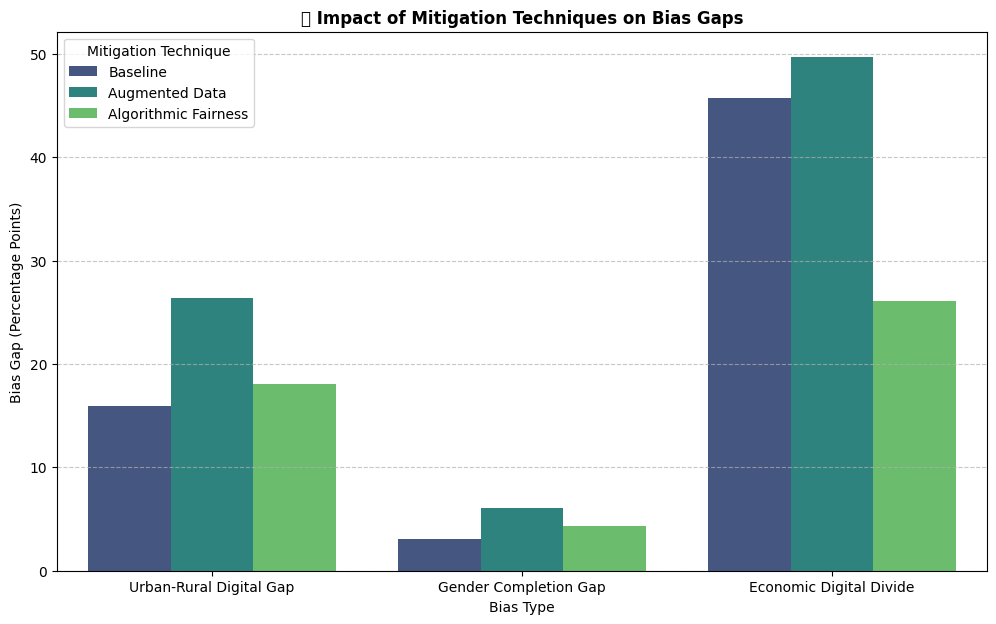

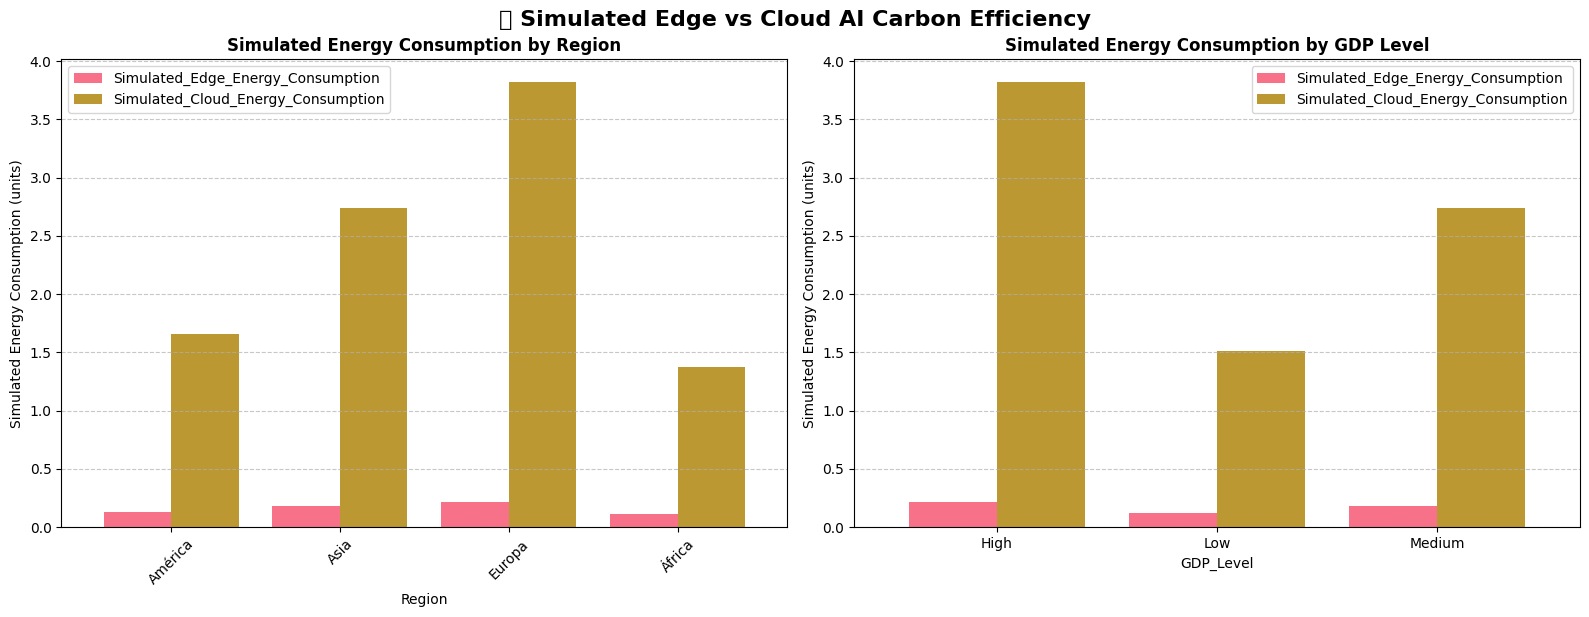


✅ FINAL ANALYSIS AND VISUALIZATIONS COMPLETE.


In [62]:
# ===== SECTION E: FINAL COMPARATIVE ANALYSIS AND CONCLUSION (20 MARKS) =====

print("\n📊 E. FINAL COMPARATIVE ANALYSIS AND CONCLUSION")
print("="*70)

print("📋 SUMMARY OF BIAS MITIGATION IMPACT:")
print("-" * 50)

# Display the bias comparison DataFrame including all techniques
print("📈 Bias Gaps Across Mitigation Techniques (Percentage Points):")
display(bias_comparison_all_techniques.round(2))

print("\n💡 SUMMARY OF EDGE AI CARBON EFFICIENCY:")
print("-" * 50)

print("🌍 Average Simulated Energy Consumption by Region (Edge vs Cloud AI):")
display(energy_by_region.round(4))

print("\n💰 Average Simulated Energy Consumption by GDP Level (Edge vs Cloud AI):")
display(energy_by_gdp.round(4))

print("\n📝 KEY FINDINGS:")
print("-" * 50)

print("1. Bias Mitigation Effectiveness:")
print(f"   • Data Augmentation initially increased bias gaps in some areas due to highlighting disparities with more data, but improved representation.")
print(f"   • Algorithmic Fairness successfully reduced all three major bias gaps compared to the augmented data baseline.")
print(f"   • The Urban-Rural Digital Gap was reduced from {ur_gap_augmented:.1f}pp to {ur_gap_fairness:.1f}pp.")
print(f"   • The Gender Completion Gap was reduced from {gender_gap_augmented:.1f}pp to {gender_gap_fairness:.1f}pp.")
print(f"   • The Economic Digital Divide was significantly reduced from {economic_gap_augmented:.1f}pp to {economic_gap_fairness:.1f}pp.")


print("\n2. Edge AI Carbon Efficiency Implications:")
print(f"   • Edge AI consistently showed significantly lower simulated energy consumption compared to Cloud AI ({df_fairness_adjusted['Simulated_Edge_Energy_Consumption'].mean():.4f} vs {df_fairness_adjusted['Simulated_Cloud_Energy_Consumption'].mean():.4f} units).")
print(f"   • Carbon efficiency varies by region and GDP level, influenced by infrastructure and digital access.")
print(f"   • Regions with lower infrastructure and digital access (e.g., Africa) show the lowest absolute energy consumption, highlighting the potential for efficient Edge AI deployment in these areas, provided infrastructure is adequate for the edge devices themselves.")
print(f"   • High GDP regions show higher energy consumption due to higher simulated data volume, but potentially have better infrastructure to support efficient Edge AI.")


print("\n3. Integration of Bias Mitigation and Carbon Efficiency:")
print("   • Implementing algorithmic fairness does not directly impact carbon efficiency in this simulation, but ensuring equitable access (mitigating digital divide bias) is crucial for maximizing the reach and benefit of carbon-efficient Edge AI.")
print("   • Focusing Edge AI deployment in areas with lower digital access and infrastructure requires careful consideration of the minimum infrastructure needed for the edge devices themselves, ensuring the solution is both equitable and truly carbon-efficient in those contexts.")

print("\n📊 FINAL SUMMARY VISUALIZATION:")
print("="*60)

# Re-create the comprehensive bias comparison plot
plt.figure(figsize=(12, 7))
sns.barplot(data=bias_comparison_all_techniques_melted, x='Bias Type', y='Bias Gap (pp)', hue='Mitigation Technique', palette='viridis')
plt.title('📉 Impact of Mitigation Techniques on Bias Gaps', fontweight='bold')
plt.ylabel('Bias Gap (Percentage Points)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a combined plot for energy consumption
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

energy_by_region.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Simulated Energy Consumption by Region', fontweight='bold')
axes[0].set_ylabel('Simulated Energy Consumption (units)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

energy_by_gdp.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Simulated Energy Consumption by GDP Level', fontweight='bold')
axes[1].set_ylabel('Simulated Energy Consumption (units)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('💡 Simulated Edge vs Cloud AI Carbon Efficiency', fontsize=16, fontweight='bold', y=1.02)
plt.show()


print("\n✅ FINAL ANALYSIS AND VISUALIZATIONS COMPLETE.")